# Algorithm 5: Hough Transform

```
1. Initial: let A be a set of N points
2. Initialize the accumulator array by setting all elements to 0 
3. Construct values for the array
4. Choose the element with max. votes V_max
5. If V_max is less than a threshold,terminate
6. Otherwise, determine the inliers
7. Fit a line through the inliers and store the line
8. Remove the inliers from the set, go to step 2
```

## Reference

Roland Siegwart, Illah Nourbakhsh, and Davide Scaramuzza. Introduction to Autonomous Mobile Robots. MIT Press, 2nd edition, 2011.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
from HoughTransform.hough_transform import HoughTransform

In [2]:
testdata = []
for i in range(6):
    with open('/Users/hdumcke/git/lidar-simulator/jupyternb/data/testLineExtraction%s.mat.pickle' % str(i+1), 'rb') as f:
        testdata.append(pickle.load(f))

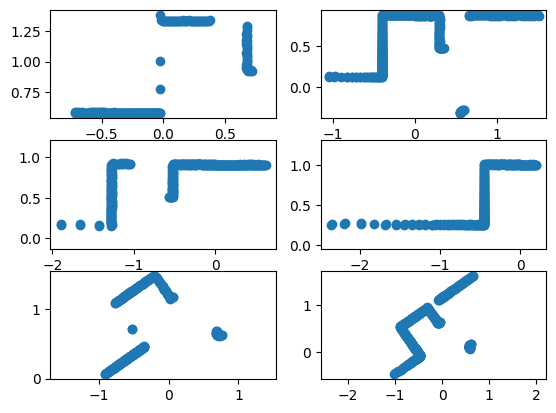

In [3]:
fig, axs = plt.subplots(3, 2)
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    x = testdata[i]['rho'] * np.cos(testdata[i]['theta'])
    y = testdata[i]['rho'] * np.sin(testdata[i]['theta'])
    axs[row_index, column_index].scatter(x, y)

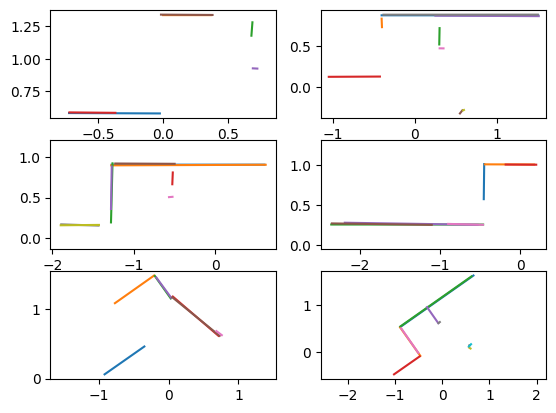

In [4]:
ht = HoughTransform()

fig, axs = plt.subplots(3, 2)
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    x = testdata[i]['rho'] * np.cos(testdata[i]['theta'])
    y = testdata[i]['rho'] * np.sin(testdata[i]['theta'])
    segend, seglen, pointIdx_a = ht.extractLines(x[0], y[0])
    for j in range(len(segend)):
        axs[row_index, column_index].plot([segend[j][0], segend[j][2]], [segend[j][1], segend[j][3]])

In [5]:
from LidarSim.lidar_sim import LidarSimulator
lidar = LidarSimulator("rectangle.stl")

In [6]:
point = [500, 300]
yaw = np.radians(0)
#plot_scan = lidar.get_lidar_points(point[0], point[1], yaw, theta=0, view_range=25)
plot_scan = lidar.get_lidar_points(point[0], point[1], yaw)

In [7]:
# get carthesian coordinates
x = []
y = []
for alpha, r in plot_scan:
    x.append(r * np.cos(alpha)+ point[0])
    y.append(r * np.sin(alpha) + point[1])

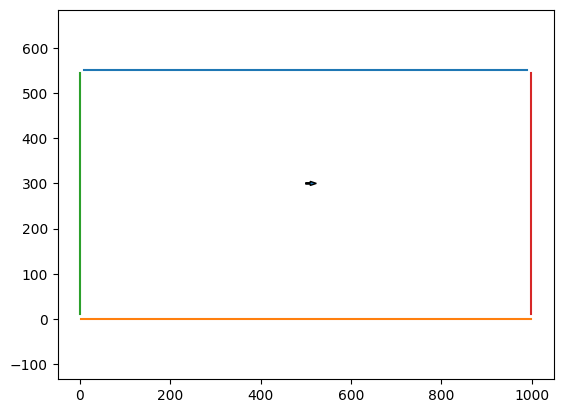

In [8]:
ht = HoughTransform(rho_samples=200000)

fig,ax = plt.subplots()
ax.axis('equal')
plt.arrow(point[0], point[1], 10 * np.cos(yaw), 10 * np.sin(yaw), width=3.0)
#plt.scatter (x[211:329], y[211:329])
segend, seglen, pointIdx_a = ht.extractLines(x, y)
for j in range(len(segend)):
    ax.plot([segend[j][0], segend[j][2]], [segend[j][1], segend[j][3]])

In [9]:
import Utilities.utilities as utilities

In [10]:
from LidarSim.lidar_sim import LidarSimulator
lidar = LidarSimulator("maze.stl")
triangles = lidar.get_map_triangles()
point = [25, 25]
yaw = np.radians(90)

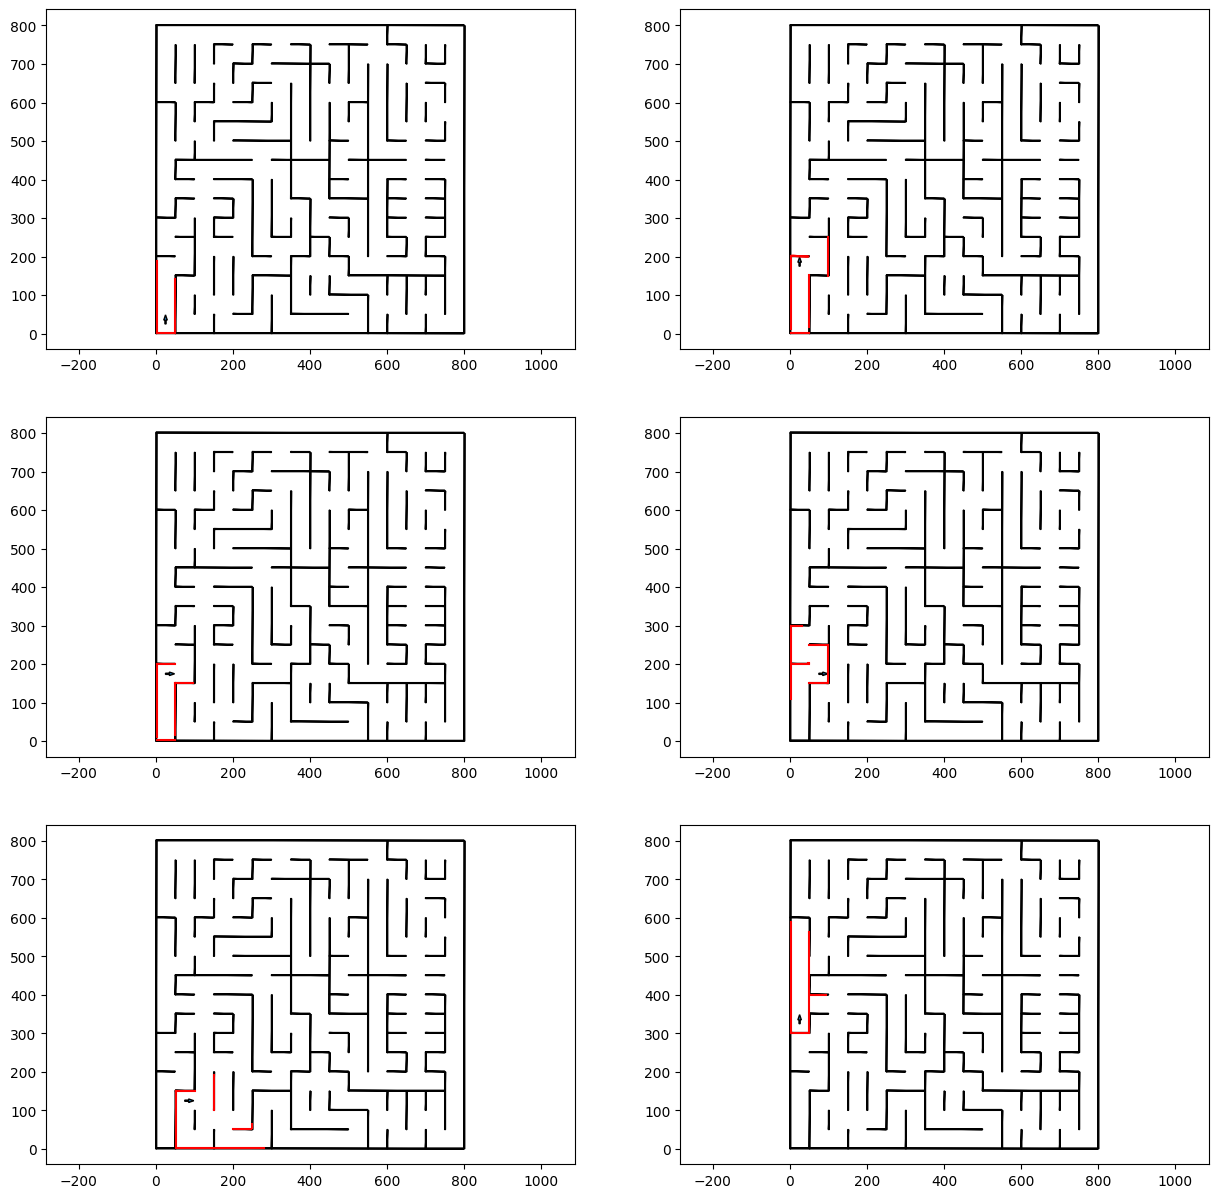

In [11]:
pose = [[25, 25, 90 ],
        [25, 175, 90 ],
        [25, 175, 0 ],
        [75, 175, 0 ],
        [75, 125, 0 ],
        [25, 325, 90 ]]

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    point = pose[i][0:2]
    yaw = np.radians(pose[i][2])
    plot_scan = lidar.get_lidar_points(point[0], point[1], yaw)
    # get carthesian coordinates
    x = []
    y = []
    for alpha, r in plot_scan:
        x.append(r * np.cos(alpha)+ point[0])
        y.append(r * np.sin(alpha) + point[1])
    
    ht = HoughTransform(rho_samples=200000)

    axs[row_index, column_index].arrow(point[0], point[1], 10 * np.cos(yaw), 10 * np.sin(yaw), width=3.0)
    segend, seglen, pointIdx_a = ht.extractLines(x, y)
    for j in range(len(segend)):
        x_p, y_p = utilities.rotate_segend(segend[j], point, yaw)
        axs[row_index, column_index].plot(x_p, y_p, 'r')
    for t in triangles:
        axs[row_index, column_index].fill(t[:, 0],t[:, 1],fill=False)

In [12]:
from LidarSim.lidar_sim import LidarSimulator
lidar = LidarSimulator("racetrack.stl")
triangles = lidar.get_map_triangles()
yaw = np.radians(180)

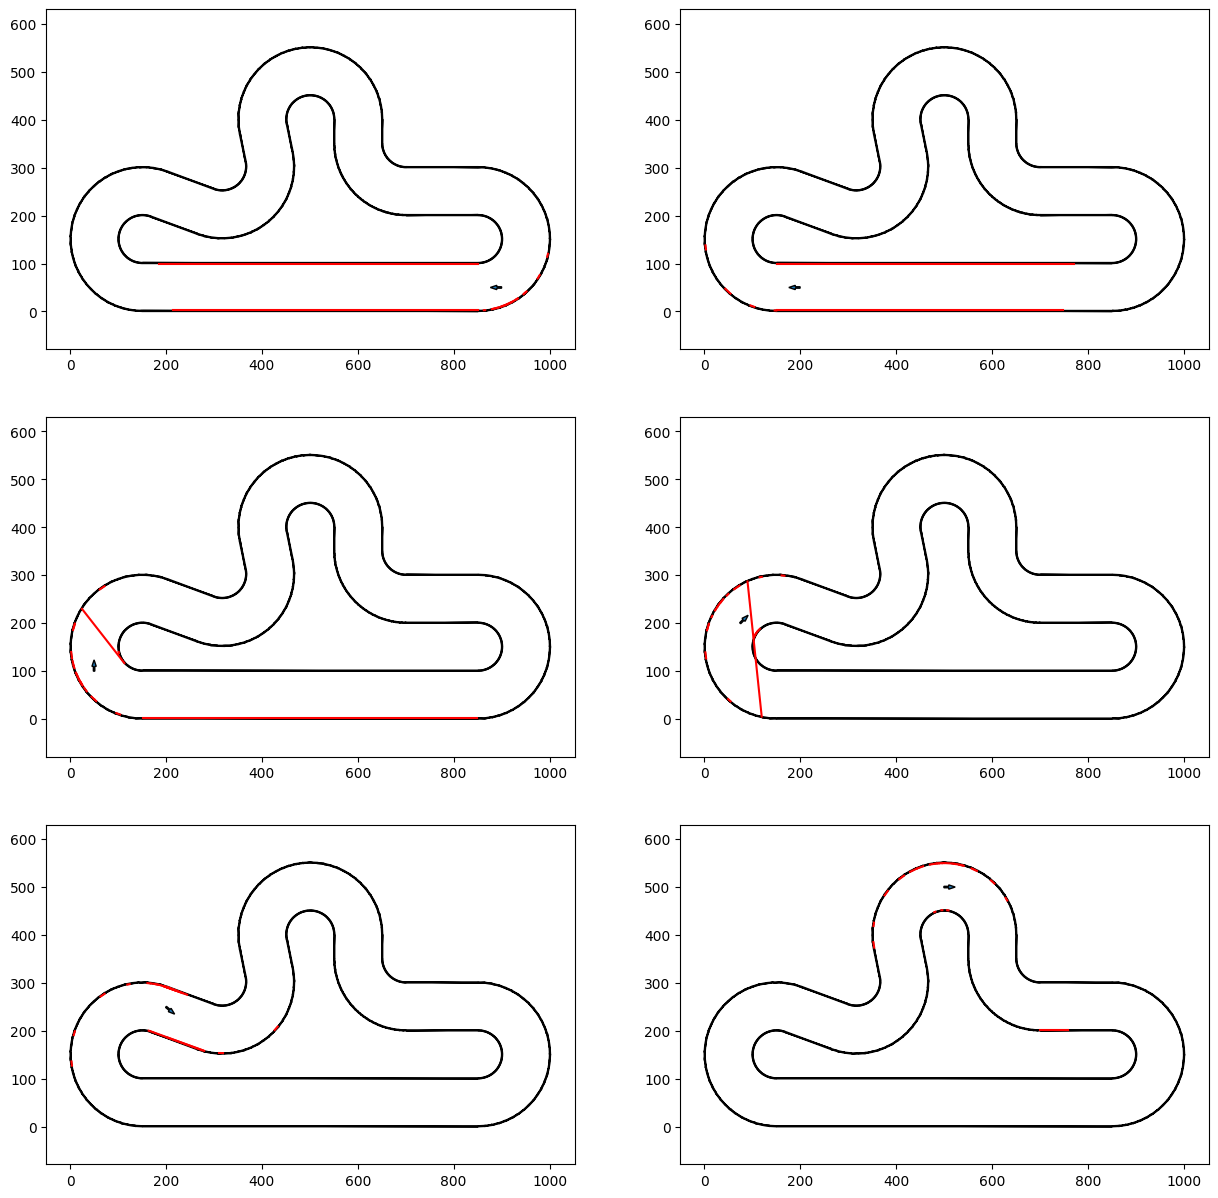

In [13]:
pose = [[900, 50, 180 ],
        [200, 50, 180 ],
        [50, 100, 90 ],
        [75, 200, 45 ],
        [200, 250, -40 ],
        [500, 500, 0 ]]

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    point = pose[i][0:2]
    yaw = np.radians(pose[i][2])
    plot_scan = lidar.get_lidar_points(point[0], point[1], yaw)
    # get carthesian coordinates
    x = []
    y = []
    for alpha, r in plot_scan:
        x.append(r * np.cos(alpha)+ point[0])
        y.append(r * np.sin(alpha) + point[1])
    
    segend, seglen, pointIdx_a = ht.extractLines(x, y)

    axs[row_index, column_index].arrow(point[0], point[1], 10 * np.cos(yaw), 10 * np.sin(yaw), width=3.0)
    for j in range(len(segend)):
        x_p, y_p = utilities.rotate_segend(segend[j], point, yaw)
        axs[row_index, column_index].plot(x_p, y_p, 'r')
    for t in triangles:
        axs[row_index, column_index].fill(t[:, 0],t[:, 1],fill=False)
    
    #axs[row_index, column_index].scatter (x, y)

## Issues with Hough Transform

The Hough Transform finds infinite lines. If two segments are on the same line they are considered the same as we can see with the maze example

The Hough Transform alows allows to detect circles. In the case of the race track we know that we are only looking for circles with a radius of either 50 or 150 which simplifies the parameter stace significantly.

For the circle detection I used https://github.com/PavanGJ/Circle-Hough-Transform.git as inspiration

More work would be required to make this usefull like filtering relevant arc of the circles and detecting smaller lines when exiting a circle

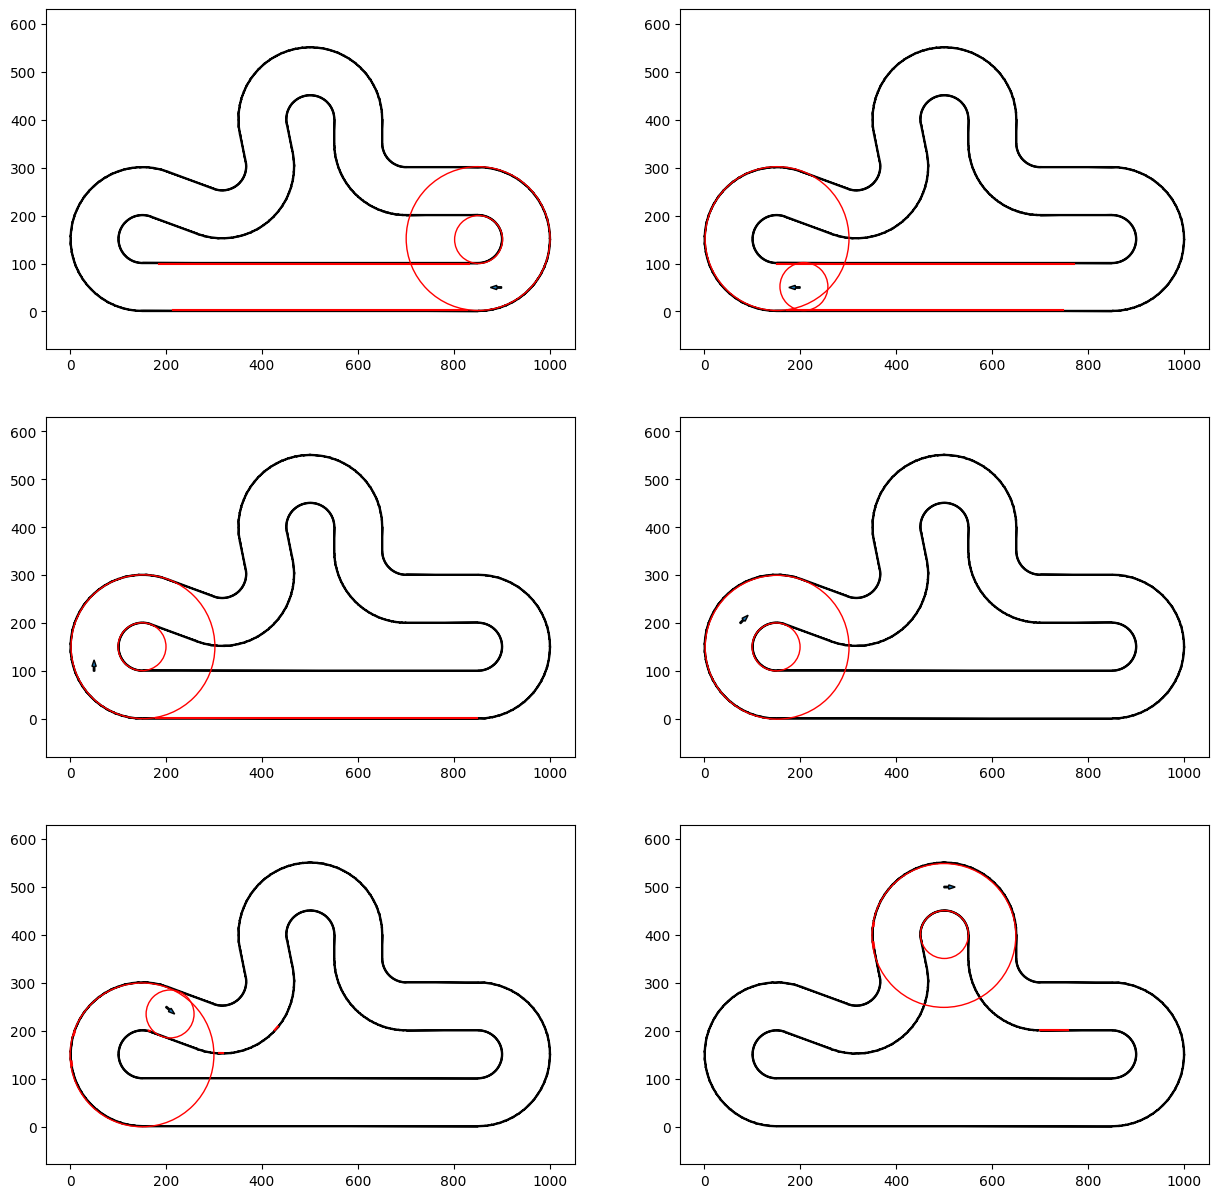

In [14]:
pose = [[900, 50, 180 ],
        [200, 50, 180 ],
        [50, 100, 90 ],
        [75, 200, 45 ],
        [200, 250, -40 ],
        [500, 500, 0 ]]

circles = [[], [], [], [], [], []]

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    point = pose[i][0:2]
    yaw = np.radians(pose[i][2])
    plot_scan = lidar.get_lidar_points(point[0], point[1], yaw)
    # get carthesian coordinates
    x = []
    y = []
    for alpha, r in plot_scan:
        x.append(r * np.cos(alpha)+ point[0])
        y.append(r * np.sin(alpha) + point[1])
    
    segend, seglen, pointIdx_a = ht.extractCircles(x, y)

    axs[row_index, column_index].arrow(point[0], point[1], 10 * np.cos(yaw), 10 * np.sin(yaw), width=3.0)
    for j in range(len(segend)):
        if len(segend[j]) == 3:
            x_c, y_c = utilities.rotate_segend([segend[j][1], segend[j][2], 0, 0], point, yaw)
            circles[i].append(plt.Circle((x_c[0],y_c[0]),segend[j][0],color=(1,0,0),fill=False))
        else:    
            x_p, y_p = utilities.rotate_segend(segend[j], point, yaw)
            axs[row_index, column_index].plot(x_p, y_p, 'r')
    for t in triangles:
        axs[row_index, column_index].fill(t[:, 0],t[:, 1],fill=False)    
    for c in circles[i]:
        axs[row_index, column_index].add_patch(c)
    
    #axs[row_index, column_index].scatter (x, y)